**Imports**

In [1]:
import time
import numpy as np
import optuna
import optuna.visualization as vis
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

c:\Users\901219015\Desktop\UNI\Master\Spring_Semester\Optimization_for_ML\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


**Load data**

In [2]:
def load_data():
    digits = load_digits()
    X_train, X_test, y_train, y_test = train_test_split(
        digits.data, digits.target, test_size=0.2, random_state=42
    )
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = load_data()


**OPTIMIZATIONS**

In [3]:
SEED = 42

**Grid Search**

In [4]:
def grid_search(trial):
    n_estimators = trial.suggest_categorical("n_estimators", [50, 100, 200])
    max_depth = trial.suggest_categorical("max_depth", [None, 10, 20])
    min_samples_split = trial.suggest_categorical("min_samples_split", [2, 5, 10])
    
    clf = RandomForestClassifier(
        n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, random_state=SEED
    )
    return np.mean(cross_val_score(clf, X_train, y_train, cv=3, n_jobs=-1))

**Random Search**

In [5]:
def random_search(trial):
    n_estimators = trial.suggest_int("n_estimators", 50, 200, step=50)
    max_depth = trial.suggest_categorical("max_depth", [None, 10, 20])
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10, step=3)
    
    clf = RandomForestClassifier(
        n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, random_state=SEED
    )
    return np.mean(cross_val_score(clf, X_train, y_train, cv=3, n_jobs=-1))

**Bayesian Search**

In [6]:
def bayesian_search(trial):
    n_estimators = trial.suggest_int("n_estimators", 50, 200, step=50)
    max_depth = trial.suggest_categorical("max_depth", [None, 10, 20])
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10, step=3)
    
    clf = RandomForestClassifier(
        n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, random_state=42
    )
    return np.mean(cross_val_score(clf, X_train, y_train, cv=3, n_jobs=-1))

**Base model**

In [7]:
def baseline_model():
    clf = RandomForestClassifier(random_state=SEED)
    return np.mean(cross_val_score(clf, X_train, y_train, cv=3, n_jobs=-1))

**Run the optimizations**

In [ ]:
def run_optimization():
    global X_train, X_test, y_train, y_test
    X_train, X_test, y_train, y_test = load_data()
    
    studies = {}
    execution_times = {}
    
    print("Running Baseline Model...")
    start_time = time.time()
    baseline_accuracy = baseline_model()
    end_time = time.time()
    baseline_time = end_time - start_time
    print(f"Baseline Model Accuracy: {baseline_accuracy:.4f}, Time: {baseline_time:.2f}s")
    
    execution_times["Baseline"] = baseline_time
    
    for name, objective in zip(["Grid search", "Random search", "Bayesian search"], 
                               [grid_search, random_search, bayesian_search]):
        print(f"Running {name} Optimization...")
        study = optuna.create_study(direction="maximize")
        start_time = time.time()
        study.optimize(objective, n_trials=100)
        end_time = time.time()
        execution_time = end_time - start_time
        print(f"Best Parameters ({name}): {study.best_params}, Time: {execution_time:.2f}s")
        studies[name] = study
        execution_times[name] = execution_time
    
    return studies, execution_times


**List of Searches for the plotting**

In [9]:
execution_times = {}

# Run the optimization and get the studies and execution times and set the seed to ensure reproducibility
studies = {
    "grid": optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler(seed=42)),
    "random": optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler(seed=42)),
    "bayesian": optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler(seed=42)),
}

for name, study in studies.items():
    study.study_name = name

[I 2025-03-29 01:41:36,487] A new study created in memory with name: no-name-8f5efd47-8ab3-4263-b35d-196e20285dd4
[I 2025-03-29 01:41:36,489] A new study created in memory with name: no-name-bfabee5d-2675-4ce2-9f71-374c02a0f1d4
[I 2025-03-29 01:41:36,491] A new study created in memory with name: no-name-501d7fae-82c9-4240-af7d-ae0dd742d6b4


**Plotting**

In [10]:
def plot_results(studies):
    optuna_studies = {name: study for name, study in studies.items() if name != "Baseline"}

    for name, study in optuna_studies.items():
        study.study_name = name  

    vis.plot_optimization_history(list(optuna_studies.values())).show()

    best_scores = {name: study.best_value for name, study in optuna_studies.items()}

    print("Best Accuracy Scores:")
    for name, score in best_scores.items():
        print(f"{name}: {score:.4f}")
        
studies, execution_times = run_optimization()

Running Baseline Model...


[I 2025-03-29 01:41:38,934] A new study created in memory with name: no-name-42b505ce-011a-4af6-bcd6-51bac867b4ca


Baseline Model Accuracy: 0.9701, Time: 2.40s
Running Grid search Optimization...


[I 2025-03-29 01:41:40,578] Trial 0 finished with value: 0.9700765483646486 and parameters: {'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 2}. Best is trial 0 with value: 0.9700765483646486.
[I 2025-03-29 01:41:42,175] Trial 1 finished with value: 0.9659011830201809 and parameters: {'n_estimators': 100, 'max_depth': None, 'min_samples_split': 5}. Best is trial 0 with value: 0.9700765483646486.
[I 2025-03-29 01:41:43,899] Trial 2 finished with value: 0.9561586638830897 and parameters: {'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 10}. Best is trial 0 with value: 0.9700765483646486.
[I 2025-03-29 01:41:44,081] Trial 3 finished with value: 0.965205288796103 and parameters: {'n_estimators': 50, 'max_depth': 10, 'min_samples_split': 2}. Best is trial 0 with value: 0.9700765483646486.
[I 2025-03-29 01:41:44,383] Trial 4 finished with value: 0.9561586638830897 and parameters: {'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 10}. Best is trial 0 with value

Best Parameters (Grid search): {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 2}, Time: 29.88s
Running Random search Optimization...


[I 2025-03-29 01:42:09,417] Trial 0 finished with value: 0.964509394572025 and parameters: {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 5}. Best is trial 0 with value: 0.964509394572025.
c:\Users\901219015\Desktop\UNI\Master\Spring_Semester\Optimization_for_ML\venv\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [2, 10] and step=3, but the range is not divisible by `step`. It will be replaced by [2, 8].
  warnings.warn(
[I 2025-03-29 01:42:09,744] Trial 1 finished with value: 0.9700765483646486 and parameters: {'n_estimators': 100, 'max_depth': None, 'min_samples_split': 2}. Best is trial 1 with value: 0.9700765483646486.
c:\Users\901219015\Desktop\UNI\Master\Spring_Semester\Optimization_for_ML\venv\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [2, 10] and step=3, but the range is not divisible by `step`. It will be replaced by [2, 8].
  warnings.warn(
[I 2025-03-29 01:42:09,913] 

Best Parameters (Random search): {'n_estimators': 100, 'max_depth': None, 'min_samples_split': 2}, Time: 17.91s
Running Bayesian search Optimization...


c:\Users\901219015\Desktop\UNI\Master\Spring_Semester\Optimization_for_ML\venv\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [2, 10] and step=3, but the range is not divisible by `step`. It will be replaced by [2, 8].
  warnings.warn(
[I 2025-03-29 01:42:27,575] Trial 1 finished with value: 0.964509394572025 and parameters: {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 5}. Best is trial 1 with value: 0.964509394572025.
c:\Users\901219015\Desktop\UNI\Master\Spring_Semester\Optimization_for_ML\venv\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [2, 10] and step=3, but the range is not divisible by `step`. It will be replaced by [2, 8].
  warnings.warn(
[I 2025-03-29 01:42:28,270] Trial 2 finished with value: 0.964509394572025 and parameters: {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 5}. Best is trial 1 with value: 0.964509394572025.
c:\Users\901219015\Desktop\UNI\M

Best Parameters (Bayesian search): {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2}, Time: 18.01s


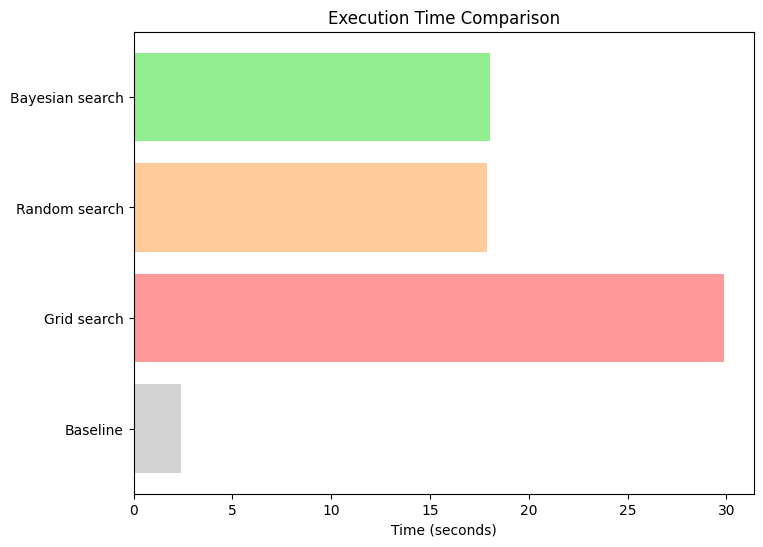

In [11]:
methods = list(execution_times.keys())
times = list(execution_times.values())

colors = ['lightgrey', '#FF9999', '#FFCC99', 'lightgreen']
plt.figure(figsize=(8, 6))
plt.barh(methods, times, color=colors)
plt.xlabel("Time (seconds)")
plt.title("Execution Time Comparison")
plt.show()

In [12]:
plot_results(studies);        

Best Accuracy Scores:
Grid search: 0.9729
Random search: 0.9701
Bayesian search: 0.9708


In [13]:
def plot_params(studies):
    for name, study in studies.items():
        if name == "Baseline":
            print(f"Baseline Model Accuracy: {study:.4f}")
        else:
            fig = vis.plot_param_importances(study)  # Get the Plotly figure
            fig.update_layout(title_text=f"{name}")
            fig.show()  # Display the figure

plot_params(studies)

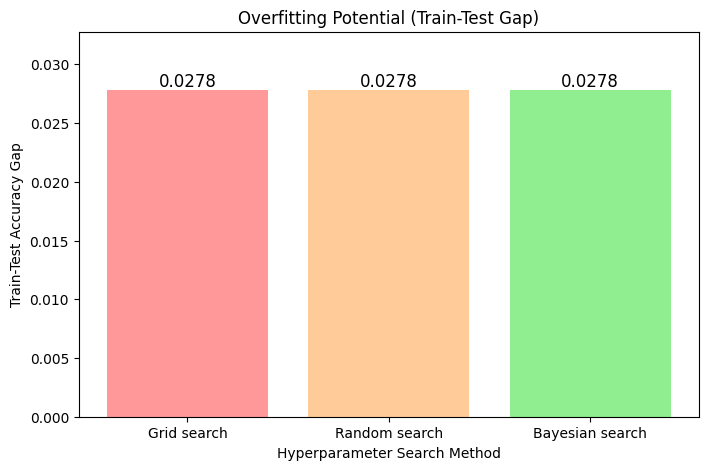

In [14]:
def calculate_overfitting_potential(studies):
    train_accuracies = []
    test_accuracies = []
    method_names = []

    for name, study in studies.items():
        if name == "Baseline":
            continue  # Skip baseline

        if not study.best_params:
            print(f"Skipping {name} due to missing best parameters.")
            continue

        # Get best parameters and train model
        best_params = study.best_params
        clf = RandomForestClassifier(**best_params, random_state=SEED)
        clf.fit(X_train, y_train)

        # Compute training and test accuracy
        train_acc = accuracy_score(y_train, clf.predict(X_train))
        test_acc = accuracy_score(y_test, clf.predict(X_test))

        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)
        method_names.append(name)

    # Compute overfitting potential (train-test accuracy gap)
    overfitting_potential = [train - test for train, test in zip(train_accuracies, test_accuracies)]

    # Plot Overfitting Potential
    plt.figure(figsize=(8, 5))
    bars = plt.bar(method_names, overfitting_potential, color=['#FF9999', '#FFCC99', 'lightgreen'])

    # Add value labels on top of bars
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                 f"{bar.get_height():.4f}", ha='center', va='bottom', fontsize=12)

    plt.xlabel("Hyperparameter Search Method")
    plt.ylabel("Train-Test Accuracy Gap")
    plt.title("Overfitting Potential (Train-Test Gap)")
    plt.ylim(0, max(overfitting_potential) + 0.005)
    plt.show()

# Run the function after optimization
calculate_overfitting_potential(studies)
